# Quantum Game  with James woonton

* Git : https://gist.github.com/quantumjim
* https://gist.github.com/quantumjim/f2fd5c727d608d032351e8ea3b4669fc

* https://medium.com/@decodoku/games-computers-and-quantum-84bfdd2c0fe0


* follow his twitter 

In [20]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ

In [66]:
damage = 0  # damage to the enemy
def attack(damage):
    damage = min ( (damage +1/3.), 1 )
    return damage

In [68]:
damage = attack(damage)
print (damage)

0.6666666666666666


In [53]:
damage_qc = QuantumCircuit(1,1)

def attack(damage_qc):
    damage_qc.rx(np.pi/3,0)

{'1': 246, '0': 754}


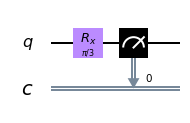

In [54]:
meas = QuantumCircuit(1,1)

meas.measure(0,0)

attack(damage_qc)

qc = damage_qc+meas
    
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()

print(counts)
qc.draw('mpl')

In [9]:
def get_damage(damage_qc):
    meas = QuantumCircuit(1,1)
    meas.measure(0,0)
    Nshots=1000
    counts = execute(damage_qc+meas, backend=Aer.get_backend('qasm_simulator'), shots=Nshots).result().get_counts()
    
    damage = counts['0']/Nshots
    print (counts)
    return 0

damage_qc = QuantumCircuit(1,1)
damage = get_damage(damage_qc)
print(damage)



#damage = attack(damage_qc)
#get_damage(damage)
#damage_qc.draw()

{'0': 1000}
0


In [10]:
meas = QuantumCircuit(1,1)
meas.measure(0,0)

damage_qc = attack(damage_qc)

qc = damage_qc+meas
    
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()

print(counts)

qc.draw()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'QuantumCircuit'

In [11]:

#some tests

qc = QuantumCircuit(1,1)

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
counts

No measurements in circuit "circuit22": count data will return all zeros.


{'0': 1000}

In [ ]:
!git clone https://github.com/quantumjim/jupyter-widget-game-engine/
!mv jupyter-widget-game-engine/jupyter_widget_engine.py jupyter_widget_engine.py
!mv jupyter-widget-game-engine/jupyter_widget_game.ipynb jupyter_widget_game.ipynb
!rm -r jupyter-widget-game-engine


In [55]:
from jupyter_widget_engine import jupyter_widget_engine

In [56]:
L = 8
    
def start(engine):
    pass

def next_frame(engine):
    pass
        
engine = jupyter_widget_engine(start, next_frame, L=L)

In [57]:
def get_terrain(x,y):
    
    
    return 'grass'
    

In [58]:
L = 8
    
def start(engine):
    engine.get_terrain = get_terrain
    engine.next_frame(engine)
    

def next_frame(engine):
    for x in range(L):
        for y in range(L):
            #terrain = engine.get_terrain(x,y)
            if engine.get_terrain(x,y) == 'grass':
                engine.screen[x,y].button_style = 'success'
            
        
engine = jupyter_widget_engine(start, next_frame, L=L)

In [76]:
def get_terrain(x,y):

    qc = QuantumCircuit(1,1) # make a circuit
    
    # perform rotations, whose angles depend on x and y
    qc.rx( (np.pi/16)*(x+y) ,0)
    qc.rx( (np.pi/16)*(x-y) ,0)
    # calculate probability for outcome 1
    qc.measure(0,0)
    counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()

    if '1' in counts:
        h = counts['1']/1000
    else:
        h = 0
        
    # return terrain depending on this probability
    # the chosen values here are fairly arbitrarily
    if h<0.3:
        terrain = 'sea'
    elif h<0.7:
        terrain = 'sand'
    else:
        terrain = 'grass'
        
    return terrain

In [77]:
L = 8
    
def start(engine):
    engine.get_terrain = get_terrain
    engine.next_frame(engine)
    
def next_frame(engine):
    for x in range(L):
        for y in range(L):
            terrain = engine.get_terrain(x,y)
            if terrain == 'grass':
                engine.screen[x,y].button_style = 'success'
            elif terrain == 'sand':
                engine.screen[x,y].button_style = 'warning'
            else:
                engine.screen[x,y].button_style = 'info'

        
engine = jupyter_widget_engine(start, next_frame, L=L)

In [78]:
L = 8
    
def start(engine):
    engine.get_terrain = get_terrain
    
    engine.p_x = 4
    engine.p_y = 4
    
    engine.next_frame(engine)
    
def next_frame(engine):

        
    if engine.controller['up'].value:
        engine.p_y -= 1
    if engine.controller['down'].value:
        engine.p_y += 1
    if engine.controller['left'].value:
        engine.p_x -= 1
    if engine.controller['right'].value:
        engine.p_x += 1
    
    s_x = np.floor(engine.p_x/L)
    s_y = np.floor(engine.p_y/L)

    for x in range(L):
        for y in range(L):
            terrain = engine.get_terrain(L*s_x+x,L*s_y+y)
            if terrain == 'grass':
                engine.screen[x,y].button_style = 'success'
            elif terrain == 'sand':
                engine.screen[x,y].button_style = 'warning'
            else:
                engine.screen[x,y].button_style = 'info'
                       
    engine.screen[engine.p_x%L, engine.p_y%L].button_style = 'danger'
        
engine = jupyter_widget_engine(start, next_frame, L=L)